# 机器学习数据预处理

### 加载数据

In [6]:
import pandas as pd

path = "iris.csv"
columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv("iris.csv", names=columns)
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### NaN数据处理

In [7]:
df.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width      True
class           False
dtype: bool

In [8]:
df.loc[pd.isna(df["petal width"])]


,sepal length,sepal width,petal length,petal width,class
25,5.0,3.0,1.6,NaN,Iris-setosa


In [9]:
df1 = df.dropna(axis=0, how="any")
df1


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df1.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

<Axes: >

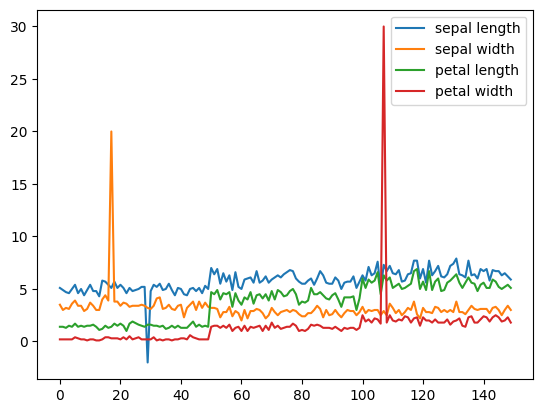

In [11]:
df1.plot()


<Axes: >

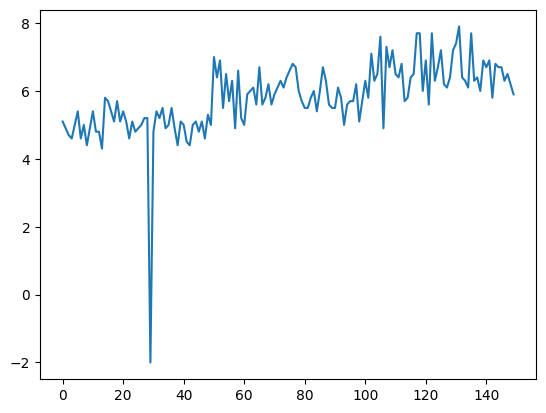

In [12]:
df1["sepal length"].plot()

<Axes: >

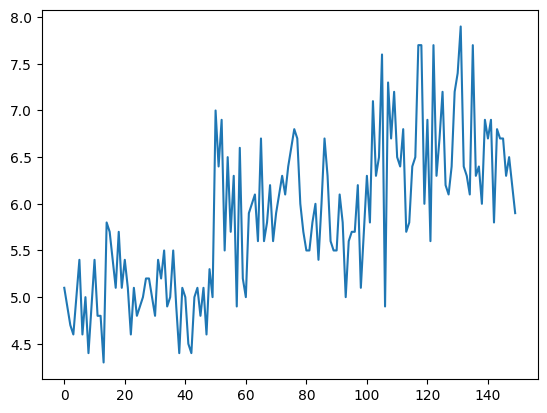

In [13]:
index = df1[df1["sepal length"]<0].index
df2 = df1.drop(index)
df2["sepal length"].plot()

<Axes: >

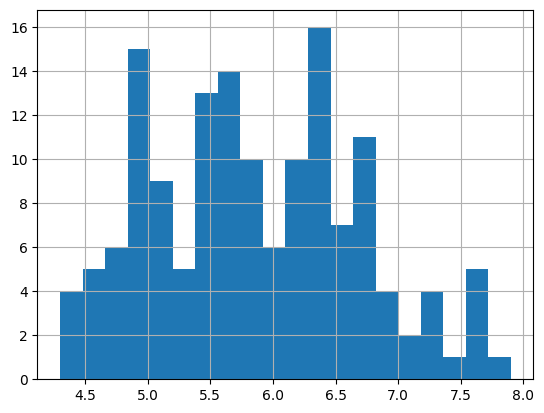

In [14]:
df2["sepal length"].hist(bins=20)

### 切分训练和测试数据

再来就是和机器学习相关的主题了。通常我们知道机器学习会分训练和测试数据集。

如果直接选一个 row index 来切分训练和预测数据。 很可能切分不均匀。比如测试数据集全部都是一个类（Iris-virginica）。

In [17]:
total_data = len(df2)
n_train = int(total_data * 0.8)

df3 = df2.sample(frac=1)
print(df3)      #乱序

train_data = df3.iloc[:n_train]
test_data = df3.iloc[n_train:]
test_data


     sepal length  sepal width  petal length  petal width           class
130           7.4          2.8           6.1          1.9  Iris-virginica
40            5.0          3.5           1.3          0.3     Iris-setosa
14            5.8          4.0           1.2          0.2     Iris-setosa
126           6.2          2.8           4.8          1.8  Iris-virginica
19            5.1          3.8           1.5          0.3     Iris-setosa
..            ...          ...           ...          ...             ...
33            5.5          4.2           1.4          0.2     Iris-setosa
106           4.9          2.5           4.5          1.7  Iris-virginica
10            5.4          3.7           1.5          0.2     Iris-setosa
18            5.7          3.8           1.7          0.3     Iris-setosa
107           7.3          2.9           6.3         30.0  Iris-virginica

[148 rows x 5 columns]


,sepal length,sepal width,petal length,petal width,class
44,5.1,3.8,1.9,0.4,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor


### 切分标签数据

In [18]:
train_data.loc[:, "class"]

130     Iris-virginica
40         Iris-setosa
14         Iris-setosa
126     Iris-virginica
19         Iris-setosa
            ...       
57     Iris-versicolor
51     Iris-versicolor
6          Iris-setosa
38         Iris-setosa
16         Iris-setosa
Name: class, Length: 118, dtype: object

In [20]:
def get_xy(df):
    return df[["sepal length", "sepal width", "petal length", "petal width"]], df[["class"]]

train_x, train_y = get_xy(train_data)
print(train_x.head())
print(train_y.head())   #train_x.head() 会显示这个 DataFrame 的前 5 行，帮助你快速查看数据的样子。

     sepal length  sepal width  petal length  petal width
130           7.4          2.8           6.1          1.9
40            5.0          3.5           1.3          0.3
14            5.8          4.0           1.2          0.2
126           6.2          2.8           4.8          1.8
19            5.1          3.8           1.5          0.3
              class
130  Iris-virginica
40      Iris-setosa
14      Iris-setosa
126  Iris-virginica
19      Iris-setosa


In [21]:
test_x, test_y = get_xy(test_data)
print(test_x.head())
print(test_y.head())

     sepal length  sepal width  petal length  petal width
44            5.1          3.8           1.9          0.4
109           7.2          3.6           6.1          2.5
110           6.5          3.2           5.1          2.0
70            5.9          3.2           4.8          1.8
71            6.1          2.8           4.0          1.3
               class
44       Iris-setosa
109   Iris-virginica
110   Iris-virginica
70   Iris-versicolor
71   Iris-versicolor


有的机器学习框架、模型可以直接使用 Pandas 数据类型，有的不一定可以，但是基本上都可以支持 Numpy array。

 所以我们还可以进一步将 Pandas 的 DataFrame 转成 Numpy array。

In [22]:
train_x_array, train_y_array = train_x.values, train_y.values
print(train_x_array[0:3,:])


[[7.4 2.8 6.1 1.9]
 [5.  3.5 1.3 0.3]
 [5.8 4.  1.2 0.2]]
